<a href="https://colab.research.google.com/github/toshal08/PRODIGY_DS_02/blob/main/PRODIGY_DS_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MOUNT THE DRIVE**

In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **IMPORT THE LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **DATA CLEANING**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/test.csv')

In [ ]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Unknown,Q,Mr,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,Unknown,S,Mrs,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Unknown,Q,Mr,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,Unknown,S,Mr,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,Unknown,S,Mrs,3


In [ ]:
df.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
413,1305,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,Unknown,S,Mr,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Dona,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,Unknown,S,Mr,1
416,1308,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,Unknown,S,Mr,1
417,1309,3,"Peter, Master. Michael J",male,27.0,1,1,2668,22.3583,Unknown,C,Master,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    category
 2   Name         418 non-null    object  
 3   Sex          418 non-null    category
 4   Age          418 non-null    float64 
 5   SibSp        418 non-null    int64   
 6   Parch        418 non-null    int64   
 7   Ticket       418 non-null    object  
 8   Fare         418 non-null    float64 
 9   Cabin        418 non-null    object  
 10  Embarked     418 non-null    category
 11  Title        418 non-null    category
 12  FamilySize   418 non-null    int64   
dtypes: category(4), float64(2), int64(4), object(3)
memory usage: 31.9+ KB


In [ ]:
df.describe()

,PassengerId,Age,SibSp,Parch,Fare,FamilySize
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,29.599282,0.447368,0.392344,35.576535,1.839713
std,120.810458,12.703770,0.896760,0.981429,55.850103,1.519072
min,892.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,996.250000,23.000000,0.000000,0.000000,7.895800,1.000000
50%,1100.500000,27.000000,0.000000,0.000000,14.454200,1.000000
75%,1204.750000,35.750000,1.000000,0.000000,31.471875,2.000000
max,1309.000000,76.000000,8.000000,9.000000,512.329200,11.000000


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,0


In [ ]:
# Fill missing Age values with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing Fare with median
df['Fare'].fillna(df['Fare'].median(), inplace=True)

# Replace missing Cabin values with 'Unknown'
df['Cabin'] = df['Cabin'].fillna('Unknown')


/tmp/ipython-input-16-850591874.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-16-850591874.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [ ]:
# Extract Title from Name
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Create new column: FamilySize
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Convert categorical columns
df['Pclass'] = df['Pclass'].astype('category')
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')
df['Title'] = df['Title'].astype('category')


In [ ]:
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Unknown,Q,Mr,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,Unknown,S,Mrs,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Unknown,Q,Mr,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,Unknown,S,Mr,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,Unknown,S,Mrs,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,Unknown,S,Mr,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Dona,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,Unknown,S,Mr,1
416,1308,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,Unknown,S,Mr,1


# **Exploratory Data Analysis (EDA)**

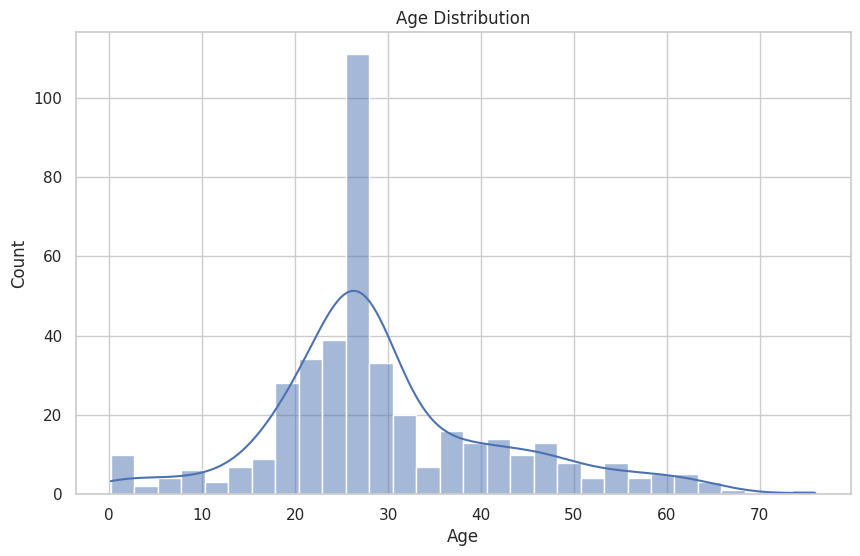

In [ ]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Age Distribution
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

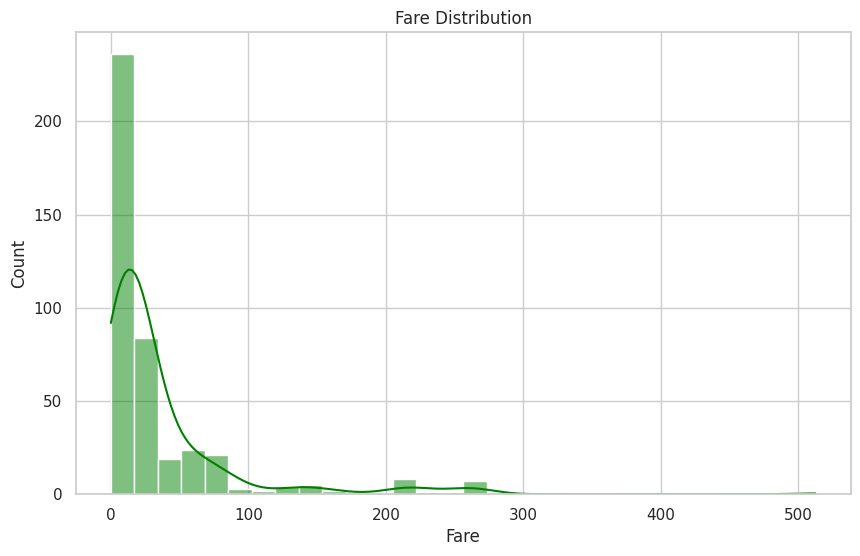

In [ ]:
# Fare Distribution
sns.histplot(df['Fare'], bins=30, kde=True, color='green')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

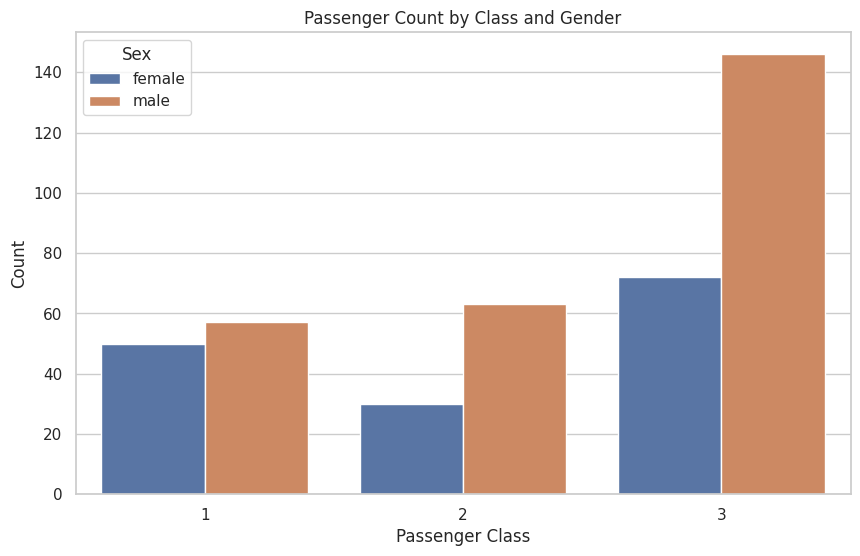

In [ ]:

# Passenger Count by Class and Gender
sns.countplot(data=df, x='Pclass', hue='Sex')
plt.title('Passenger Count by Class and Gender')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

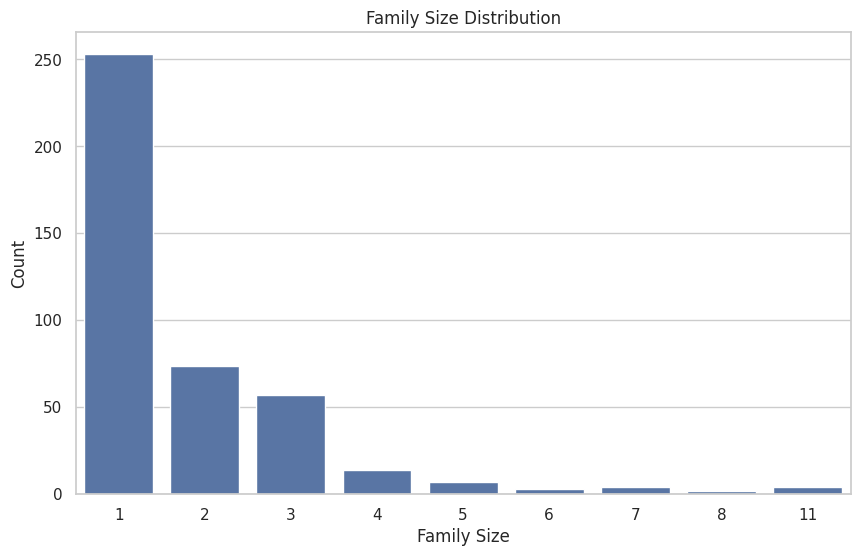

In [ ]:
# Family Size Distribution
sns.countplot(data=df, x='FamilySize')
plt.title('Family Size Distribution')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.show()

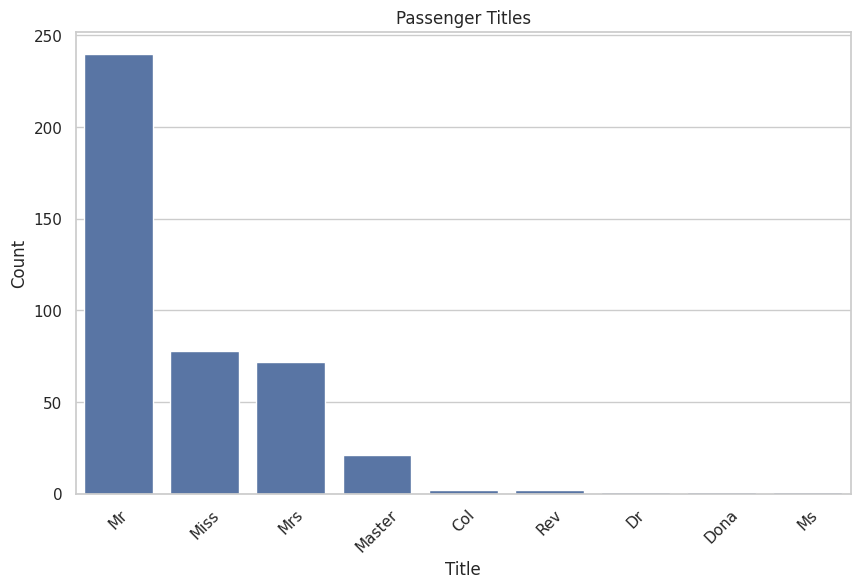

In [ ]:
# Titles
sns.countplot(data=df, x='Title', order=df['Title'].value_counts().index)
plt.title('Passenger Titles')
plt.xlabel('Title')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

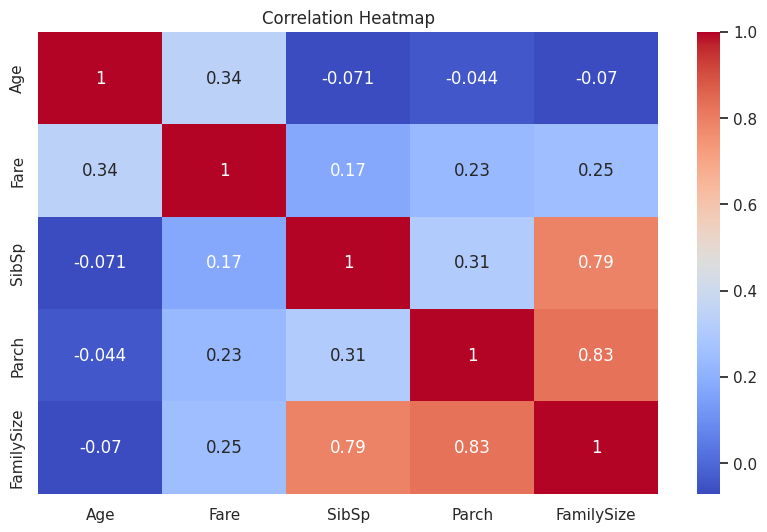

In [ ]:
# Correlation Heatmap
sns.heatmap(df[['Age', 'Fare', 'SibSp', 'Parch', 'FamilySize']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()